In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import models

In [65]:
ckpt_dir = "checkpoint/wage/lr8lr2_210_testrun-seed-100"
epoch = 300
data = torch.load(os.path.join(ckpt_dir, "checkpoint-%d.pt"%epoch))
data.keys()

dict_keys(['epoch', 'acc_dict', 'swa_n', 'full_tern', 'low_tern', 'low_acc'])

In [66]:
wl = 2
full_tern = {k:models.QW(v, wl).cpu().numpy() for k,v in data['full_tern'].items()}
low_tern = {k:models.QW(v, wl).cpu().numpy() for k,v in data['low_tern'].items()}
low_acc = {k:models.QW(v, wl).cpu().numpy() for k,v in data['low_acc'].items()}
orig = {k:models.QW(v, wl).cpu().numpy() for k,v in data['acc_dict'].items()}
layer_keys = orig.keys()
layer_keys, orig['features.1.weight'].shape

(dict_keys(['features.1.weight', 'features.4.weight', 'features.8.weight', 'features.11.weight', 'features.15.weight', 'features.18.weight', 'classifier.0.weight', 'classifier.3.weight']),
 (128, 3, 3, 3))

features.1.weight


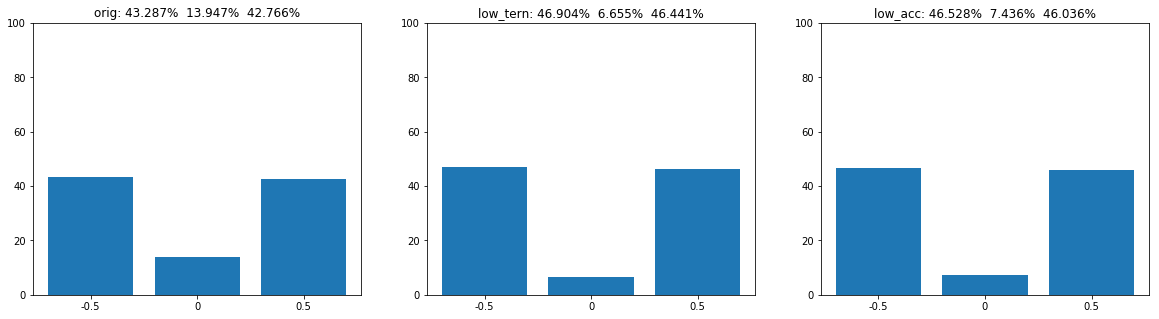

features.4.weight


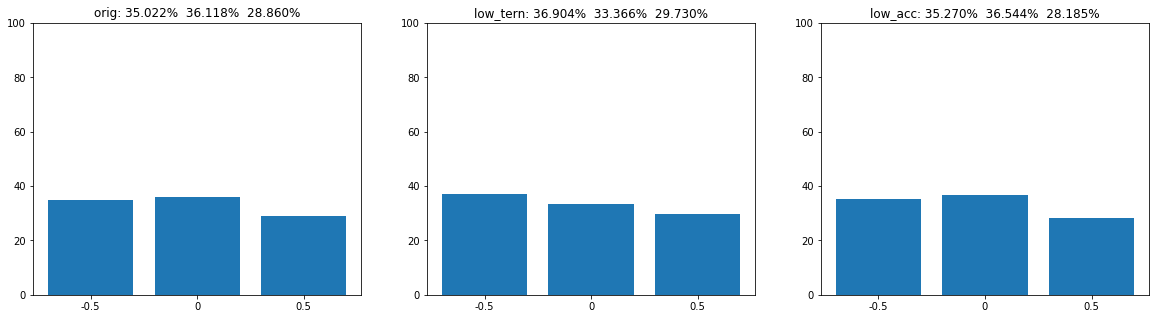

features.8.weight


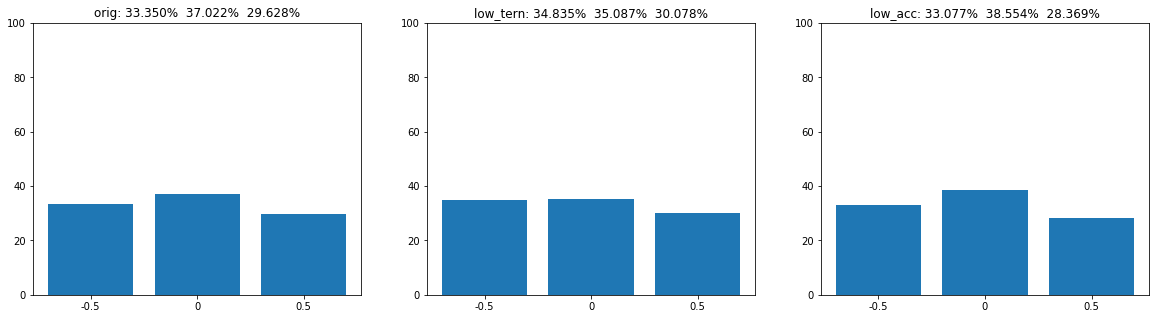

features.11.weight


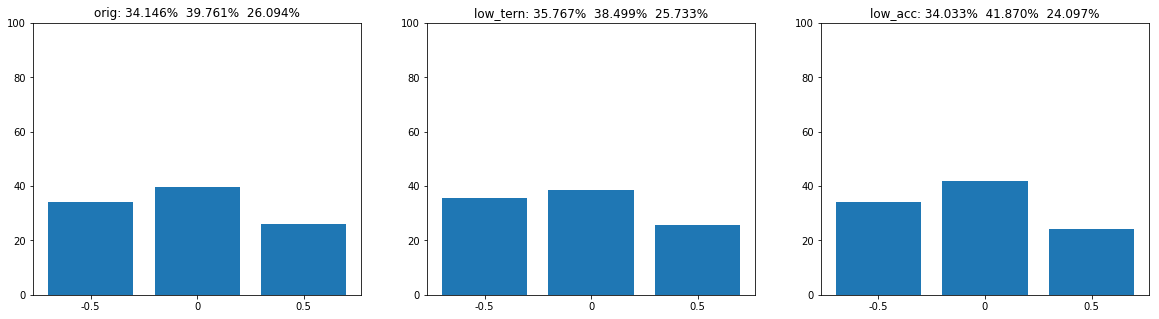

features.15.weight


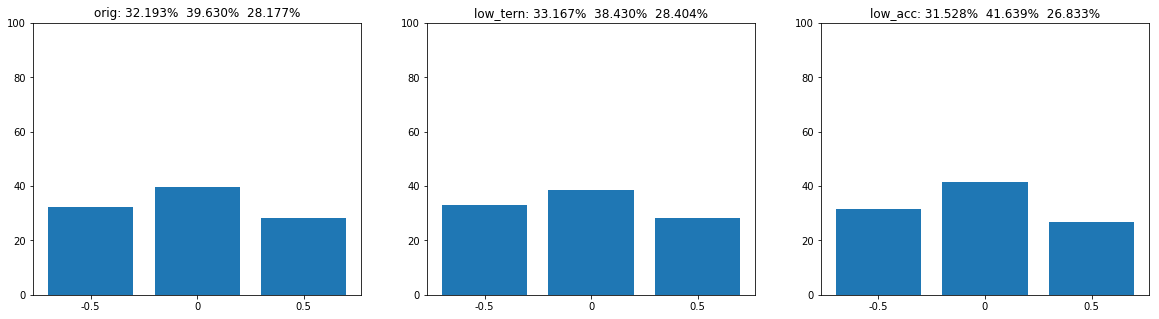

features.18.weight


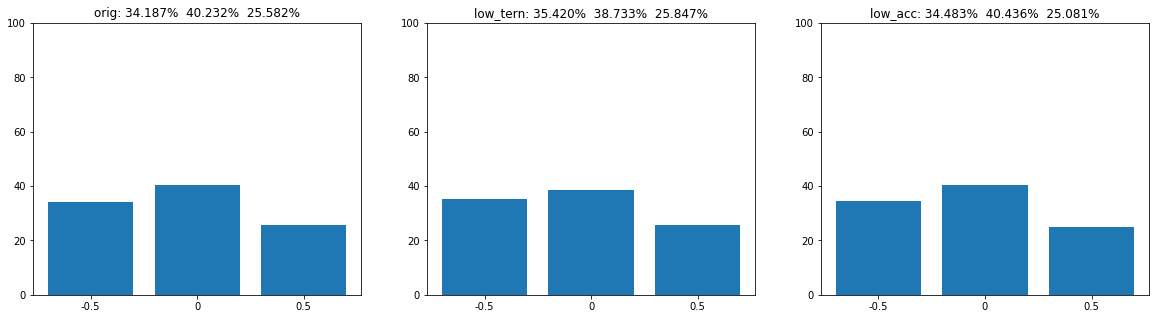

classifier.0.weight


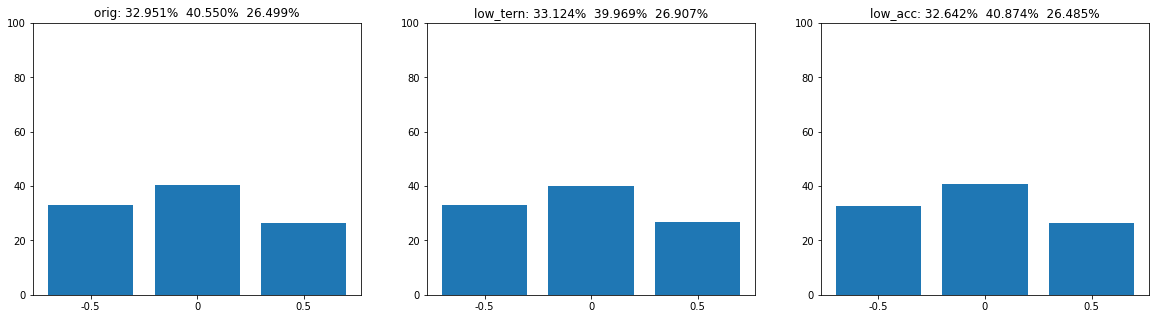

classifier.3.weight


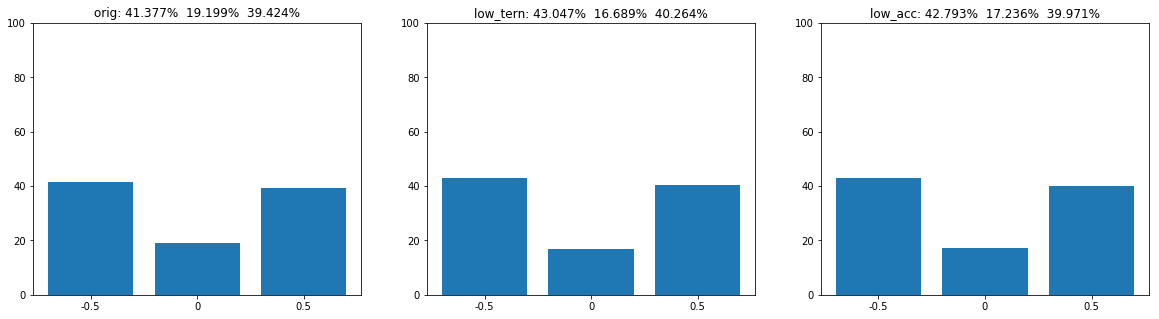

In [67]:
def plot_hist(k):
    plt.figure(figsize=(20,5))
    for i, (title, wdict) in enumerate([("orig",orig), ("low_tern",low_tern), ("low_acc",low_acc)]):
        plt.subplot(1,3,i+1)
        flat = wdict[k].flatten()
        neg_cnt = (flat < 0.).astype(np.int).sum() / float(len(flat)) * 100
        pos_cnt = (flat > 0.).astype(np.int).sum() / float(len(flat)) * 100
        zeros_cnt = (flat == 0.).astype(np.int).sum() / float(len(flat)) * 100
        plt.bar(np.arange(3), [neg_cnt, zeros_cnt, pos_cnt])
        plt.title("%s: %2.3f%%  %2.3f%%  %2.3f%%"%(title, neg_cnt, zeros_cnt, pos_cnt))
        plt.ylim(0, 100)
        plt.xticks(np.arange(3), ["-0.5", "0", "0.5"])
#         plt.hist(wdict[k].flatten(), bins=3, range=(-0.5, 0.5), density=True)
    
    plt.show()

for k in layer_keys:
    print(k)
    plot_hist(k)